# operational Lib.s
* torchviz: 0.0.2 (여기선 0.0.3 으로 나옴)
* torchsummary: 1.5.1

In [43]:
!pip install --quiet torchviz

In [44]:
#!pip install torchsummary
!pip install --quiet torchinfo # 이것을 더 추천함!

In [45]:
# 특정 패키지를 찾을 때, !pip list |~~ 사용(l이 아니라 파이프임)
!pip list |grep torchviz
# !pip list |grep torchsummary
!pip list |grep torchinfo

torchviz                           0.0.3
torchinfo                          1.8.0


# Custom ANN 코드 import 부분임
# import lib.

In [46]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# import torchviz, torchsummary

In [47]:
from torch.nn import Module, init, Linear, Parameter, ReLU
from torch import optim

In [48]:
#for c in [np,torch,torchviz,torchsummary]:
for c in [np, torch]:
  print(f'{c.__name__}:{c.__version__}')

numpy:2.0.2
torch:2.6.0+cu124


# =========================================================
# 이론 관련 내용 확인하는 코드
관련 강의 자료: https://ds31x.tistory.com/421


In [11]:
import torch
import torch.nn as nn

x = torch.randn(32, 10, 16)  # 배치 32, 시퀀스 길이 10, feature 16
fc = nn.Linear(16, 8)
y = fc(x)

print(y.shape)  # torch.Size([32, 10, 8])

torch.Size([32, 10, 8])


In [15]:
# 여기서 부터 parameters 확인하는 코드
print(fc.weight.shape) # torch.Size([8, 16])
print(fc.bias.shape) # torch.Size([8]

torch.Size([8, 16])
torch.Size([8])


In [16]:
import torch.nn as nn
model = nn.Linear(10, 5)
for para in model.parameters():
  print(para.shape)

#torch.Size([5, 10])
#torch.Size([5])

torch.Size([5, 10])
torch.Size([5])


In [17]:
for name, param in model.named_parameters():
    print(name, param.shape)

weight torch.Size([5, 10])
bias torch.Size([5])


In [18]:
# 여기서 부터는 Activation Function과 연결 확인 코드임
import torch.nn.functional as F

x = torch.randn(4, 16)
fc = nn.Linear(16, 8)
out = F.relu(fc(x))  # Linear + ReLU

In [ ]:
model = nn.Sequential(
    nn.Linear(16, 8),
    nn.ReLU()
)
#or seqantial로 구조화한 것 코드임

#==========================================================
Custom ANN data생성 부분 코드부터 다시 쭉 이어짐.

# data 생성
* input: -
* output: x(tensor), y(tensor) = y_ideal + noise



In [49]:
def gen_xy(cnt, std=4. ):
  x = np.linspace(-10,10,cnt)
  y_ideal = 1.8 * x +32.
  y = y_ideal + std * np.random.randn((cnt))

  x = torch.from_numpy(x).float().reshape(-1,1)
  y = torch.from_numpy(y).float().reshape(-1,1)
  y_ideal = torch.from_numpy(y_ideal).float().reshape(-1,1)

  return x, y, y_ideal

코드로 데이터 check하는 부분

torch.Size([20, 1]) torch.Size([20, 1]) torch.Size([20, 1])


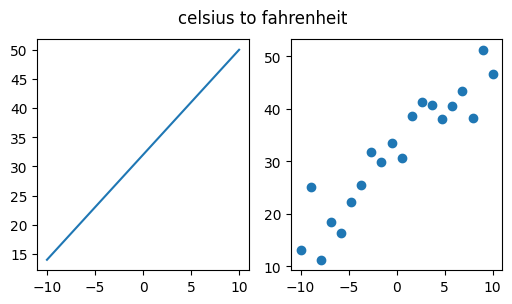

In [51]:
sample_cnt = 20

x, y, y_ideal = gen_xy(sample_cnt)

fig, axes = plt.subplots(1,2, figsize=(6,3))
axes[0].plot(x.detach(), y_ideal.detach())
axes[1].scatter(x.detach(), y.detach())
fig.suptitle('celsius to fahrenheit')
print(x.shape, y.shape, y_ideal.shape)

# model 구현

In [70]:
class Jy02ANN (Module): #custom module

    def __init__(self,
                 n_in_f,  # input vector의 차원수.
                 n_out_f, # output vector의 차원수.
                 ):
        super().__init__() # required!

        self.linear0 = Linear(n_in_f, 32)
        self.relu0 = ReLU()

        self.linear1 = Linear(32, 32)
        self.relu1 = ReLU()

        self.linear2 = Linear(32, n_out_f)

        with torch.no_grad():
            init.constant_(self.linear0.bias, 0.)
            init.xavier_uniform_(self.linear0.weight)

    def forward(self,x):
        x = self.linear0(x)
        x = self.relu0(x)
        x = self.linear1(x)
        x = self.relu1(x)
        y = self.linear2(x)
        return y

model = Jy02ANN(1,1)

# model 내부 확인

parameters 확인

In [71]:
for idx, (name, c) in enumerate(model.named_parameters()):
  print(f"{idx:02}: {name}: {c.shape}")
#for idx, c in enumerate(model.parameters()):
  #print(idx, c.shape)

00: linear0.weight: torch.Size([32, 1])
01: linear0.bias: torch.Size([32])
02: linear1.weight: torch.Size([32, 32])
03: linear1.bias: torch.Size([32])
04: linear2.weight: torch.Size([1, 32])
05: linear2.bias: torch.Size([1])


childreb 확인
* 내부 구성 확인

In [72]:
for idx, cl in enumerate(model.named_children()):
  print(f"{idx:02}: {cl}")
#for idx, cl in enumerate(model.children()):
  #print(idx, cl)

00: ('linear0', Linear(in_features=1, out_features=32, bias=True))
01: ('relu0', ReLU())
02: ('linear1', Linear(in_features=32, out_features=32, bias=True))
03: ('relu1', ReLU())
04: ('linear2', Linear(in_features=32, out_features=1, bias=True))


구성 modules확인

In [73]:
#for idx, module in enumerate(model.named_modules()):
for idx, module in enumerate(model.modules()):
    print(idx, module)

0 Jy02ANN(
  (linear0): Linear(in_features=1, out_features=32, bias=True)
  (relu0): ReLU()
  (linear1): Linear(in_features=32, out_features=32, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=32, out_features=1, bias=True)
)
1 Linear(in_features=1, out_features=32, bias=True)
2 ReLU()
3 Linear(in_features=32, out_features=32, bias=True)
4 ReLU()
5 Linear(in_features=32, out_features=1, bias=True)


modules 확인

자신을 포함한 전체 child modules를 다 확인

In [74]:
for idx, (name, module) in enumerate(model.named_modules()):
    print(f"{idx:02}: [{name}] = {module}")

00: [] = Jy02ANN(
  (linear0): Linear(in_features=1, out_features=32, bias=True)
  (relu0): ReLU()
  (linear1): Linear(in_features=32, out_features=32, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=32, out_features=1, bias=True)
)
01: [linear0] = Linear(in_features=1, out_features=32, bias=True)
02: [relu0] = ReLU()
03: [linear1] = Linear(in_features=32, out_features=32, bias=True)
04: [relu1] = ReLU()
05: [linear2] = Linear(in_features=32, out_features=1, bias=True)


In [75]:
pred = model(x)
pred.shape

torch.Size([20, 1])

torchinfo 사용하기

In [89]:
from torchinfo import summary

summary(model, (1,))
# summary(model, (232,20,1), depth=1, )

Layer (type:depth-idx)                   Output Shape              Param #
Jy02ANN                                  [1]                       --
├─Linear: 1-1                            [32]                      64
├─ReLU: 1-2                              [32]                      --
├─Linear: 1-3                            [32]                      1,056
├─ReLU: 1-4                              [32]                      --
├─Linear: 1-5                            [1]                       33
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.04
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.01

In [90]:
32*32+32

1056

# loss 구현

In [92]:
from torch.nn import MSELoss

loss_fnc = MSELoss()# MSELoss 객체 반환. (callable함)
l = loss_fnc(pred, y)
l

tensor(1142.1995, grad_fn=<MseLossBackward0>)

# training loop

In [96]:
def training_loop(
    x, y,
    model,
    lr,
    n_epochs,
    ):

  model.train()
  optimizer = optim.SGD(
    model.parameters(),
    lr = lr,
  )
  print(n_epochs)

  for epoch in range(n_epochs):
    pred = model(x)
    l = loss_fnc(pred, y)
    if torch.isinf(l).any():
      print('Error: diverge!')
      break

    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 1_000 == 0:
      print(f'Epoch {epoch}: Loss {float(l):0.4f}')

  return model

여기서 중간에 가장 좋은 성능으로 학습된 것들도 있어서 그 epoch 학습된 것을 가져오거나, 그런식으로 여러 epoch 중 가장 좋은 성능을 뽑아야 함

# training 수행

In [101]:
model = Jy02ANN(1,1)
model = training_loop(
    x, y,
    model,
    1e-3,
    10000,
)

10000
Epoch 0: Loss 1121.3682
Epoch 1000: Loss 12.5589
Epoch 2000: Loss 12.1145
Epoch 3000: Loss 11.6820
Epoch 4000: Loss 11.5809
Epoch 5000: Loss 11.8287
Epoch 6000: Loss 12.1536
Epoch 7000: Loss 10.2478
Epoch 8000: Loss 11.2793
Epoch 9000: Loss 9.9750


# Evaluation 수행

Text(0.5, 0.98, 'celsius to fahrenheit')

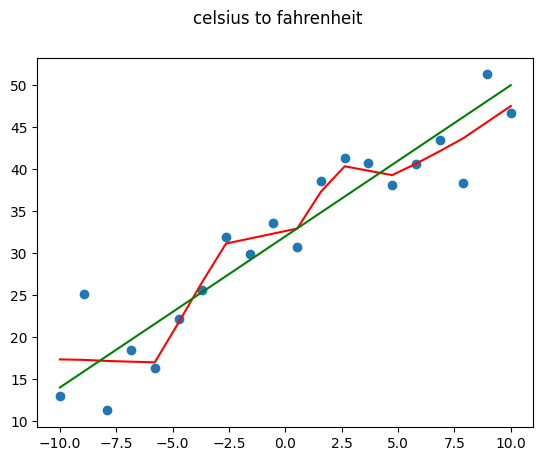

In [102]:
pred = model(x)

fig, axes = plt.subplots(1,1)
axes.scatter(x.detach().numpy(),y.detach().numpy())
axes.plot(x.detach().numpy(),pred.detach().numpy(), color='r')
axes.plot(x.detach().numpy(),y_ideal, color='g')
fig.suptitle('celsius to fahrenheit')

여기서 보면 튀어나간 point들에 따라서 따라가는 것을 볼 수 있음. 이는 noise도 학습해버림

# linear를 직접 사용

In [104]:
linear_model = training_loop(
    x,y,
    Linear(1,1),
    1e-3,
    10000,
)

10000
Epoch 0: Loss 1113.7577
Epoch 1000: Loss 35.2222
Epoch 2000: Loss 16.3363
Epoch 3000: Loss 15.9918
Epoch 4000: Loss 15.9855
Epoch 5000: Loss 15.9854
Epoch 6000: Loss 15.9854
Epoch 7000: Loss 15.9854
Epoch 8000: Loss 15.9854
Epoch 9000: Loss 15.9854


Text(0.5, 0.98, 'celsius to fahrenheit')

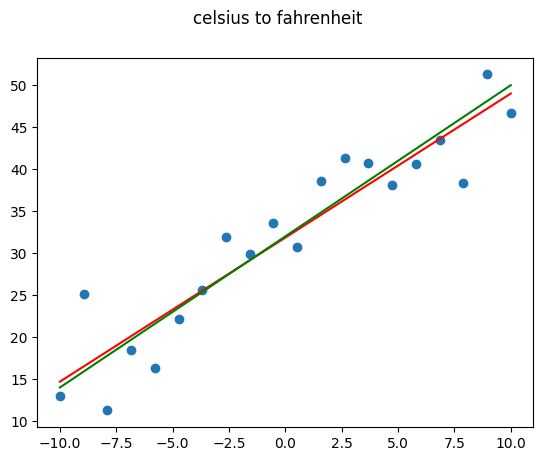

In [105]:
pred = linear_model(x)

fig, axes = plt.subplots(1,1)
axes.scatter(x.detach().numpy(),y.detach().numpy())
axes.plot(x.detach().numpy(),pred.detach().numpy(), color='r')
axes.plot(x.detach().numpy(),y_ideal, color='g')
fig.suptitle('celsius to fahrenheit')